In [1]:
%matplotlib notebook

In [2]:
# Main Code for Data 
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
import numpy as np

# File to Load (Remember to Change These)
final_data = "final_file.csv"
sales_data = 'sales.csv'

# Read Purchasing File and store into Pandas data frame
graph_df = pd.read_csv(final_data)
sales_df = pd.read_csv(sales_data)
graph_df.head()

,MonthYear,Sales,Price Per Gallon,Unemployment_Rate
0,Jan-2005,1052224.0,1.831,5.3
1,Feb-2005,1244753.0,1.910,5.4
2,Mar-2005,1564938.0,2.079,5.2
3,Apr-2005,1493837.0,2.243,5.2
4,May-2005,1488171.0,2.161,5.1


In [3]:
graph_df.dropna(how='all')
graph_df.head()

,MonthYear,Sales,Price Per Gallon,Unemployment_Rate
0,Jan-2005,1052224.0,1.831,5.3
1,Feb-2005,1244753.0,1.910,5.4
2,Mar-2005,1564938.0,2.079,5.2
3,Apr-2005,1493837.0,2.243,5.2
4,May-2005,1488171.0,2.161,5.1


<IPython.core.display.Javascript object>


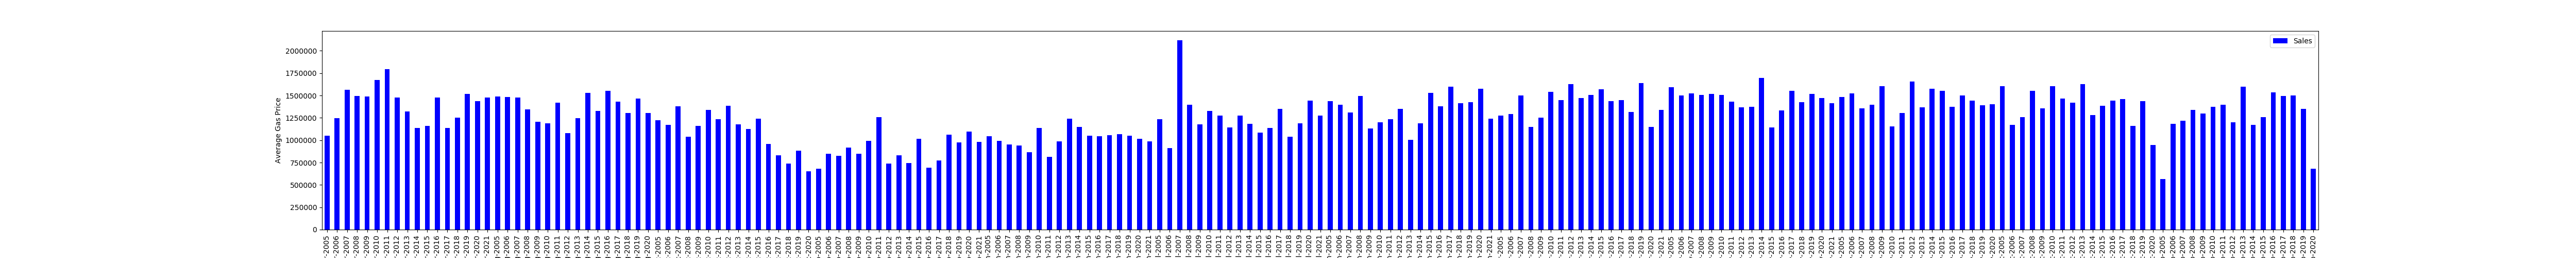

In [4]:
graph_df.plot(kind ='bar', x='MonthYear', y='Sales', color = 'blue')
plt.show()

In [5]:
mean_gas_df = graph_df.groupby('MonthYear').mean()['Price Per Gallon']
mean_gas_df.head()

MonthYear
Apr-2005    2.243
Apr-2006    2.742
Apr-2007    2.845
Apr-2008    3.458
Apr-2009    2.049
Name: Price Per Gallon, dtype: float64

In [6]:
mean_gas_df.plot(kind = "bar", color='pink', figsize=(50,5))
plt.xlabel("MonthYear")
plt.xticks(rotation=90)
plt.ylabel("Average Gas Price")
plt.show()

In [7]:
plt.savefig("Images/Average_Gas_Per_Month_Year.png")
plt.show()

In [8]:
mean_sales_df = graph_df.groupby('MonthYear').mean()['Sales']
mean_sales_df

MonthYear
Apr-2005    1493837.0
Apr-2006    1439311.0
Apr-2007    1326837.0
Apr-2008    1237336.0
Apr-2009     822746.0
              ...    
Sep-2016    1428354.0
Sep-2017    1523050.0
Sep-2018    1440820.0
Sep-2019    1282712.0
Sep-2020    1370243.0
Name: Sales, Length: 199, dtype: float64

In [9]:
mean_unemploy_df = graph_df.groupby('MonthYear').mean()['Unemployment_Rate']
mean_unemploy_df

MonthYear
Apr-2005    5.2
Apr-2006    4.7
Apr-2007    4.5
Apr-2008    5.0
Apr-2009    9.0
           ... 
Sep-2016    5.0
Sep-2017    4.2
Sep-2018    3.7
Sep-2019    3.5
Sep-2020    7.8
Name: Unemployment_Rate, Length: 199, dtype: float64

In [10]:
summary_mean_df = pd.DataFrame({"Average Gas Price":mean_gas_df,
                              "Average Sales Price":mean_sales_df,
                              "Average Unempoloyment Rate":mean_unemploy_df})
summary_mean_df.head()

,Average Gas Price,Average Sales Price,Average Unempoloyment Rate
MonthYear,,,
Apr-2005,2.243,1493837.0,5.2
Apr-2006,2.742,1439311.0,4.7
Apr-2007,2.845,1326837.0,4.5
Apr-2008,3.458,1237336.0,5.0
Apr-2009,2.049,822746.0,9.0


In [11]:
summary_mean_df.columns

Index(['Average Gas Price', 'Average Sales Price',
       'Average Unempoloyment Rate'],
      dtype='object')

<IPython.core.display.Javascript object>


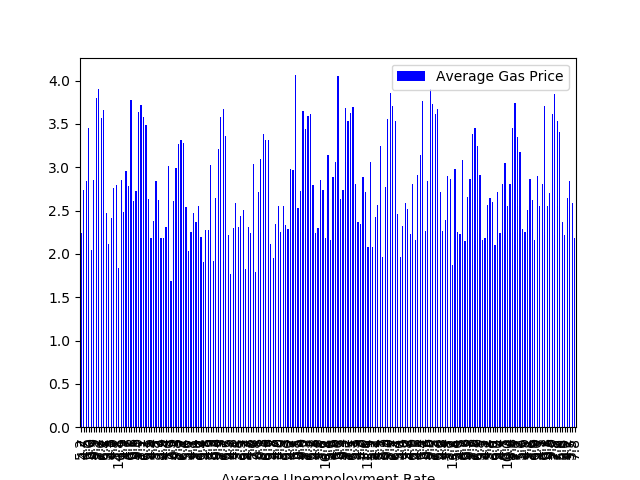

In [12]:
summary_mean_df.plot(kind ='bar', x='Average Unempoloyment Rate', y='Average Gas Price', color = 'blue')
plt.show()

In [13]:
plt.savefig("Images/Average Gas Price vs Unemployment.png")
plt.show()

<IPython.core.display.Javascript object>


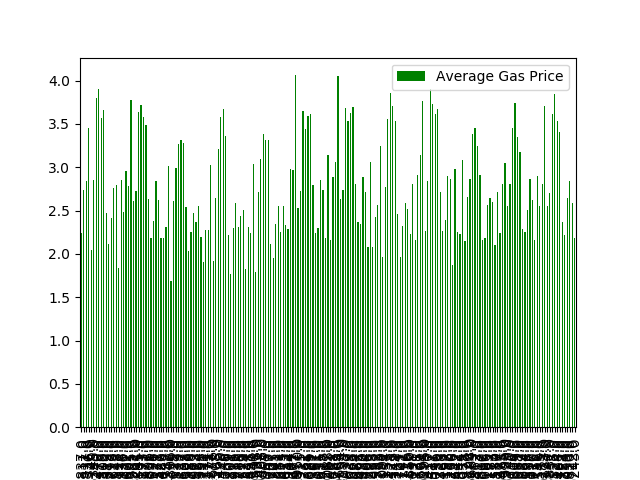

In [14]:
summary_mean2_df = summary_mean_df.plot(kind ='bar', x='Average Sales Price', y='Average Gas Price', color = 'green')
plt.show()

In [15]:
plt.savefig("Images/Average Sales vs Gas Price.png")
plt.show()

<IPython.core.display.Javascript object>


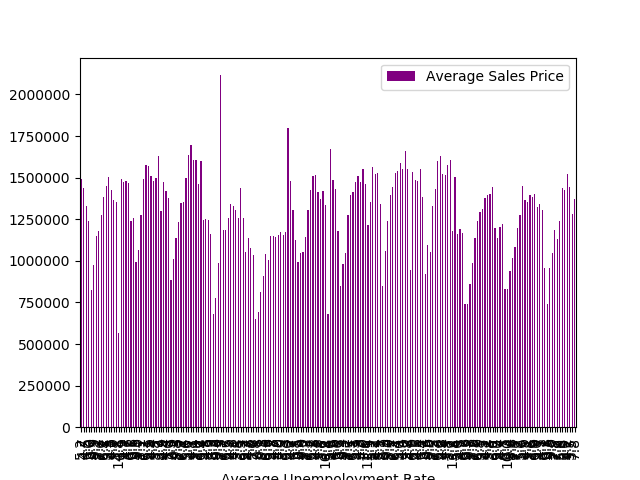

In [16]:
summary_mean3_df = summary_mean_df.plot(kind ='bar', x='Average Unempoloyment Rate', y='Average Sales Price', color = 'purple')
plt.show()

In [17]:
plt.savefig("Images/Average Unemployment vs Sales Price.png")
plt.show()